# Nivel 1

## 1.1 Haciendo conexiones

Conecta Python con MySQL Workbench y carga los datos de tu base de datos del Sprint 4 para utilizarlos en todos los ejercicios.

In [13]:
# pip install sqlalchemy

In [14]:
import pandas as pd
import mysql.connector
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Datos de conexión
user_db = 'root'
password_db = 'root'
host_db = 'localhost'
database_name = 't4'
port_db='3306'

# Conectando

# Crear el engine con SQLAlchemy
engine = create_engine(f"mysql+mysqlconnector://{user_db}:{password_db}@{host_db}:{port_db}/{database_name}")

# Creación de DataFrames
df_company = pd.read_sql("SELECT * FROM company;", engine)
df_creditcard = pd.read_sql("SELECT * FROM credit_cards;", engine)
df_products = pd.read_sql("SELECT * FROM products;", engine)
df_datauser = pd.read_sql("SELECT * FROM users;", engine)
df_transaction = pd.read_sql("SELECT * FROM transactions_t4;", engine)
df_compras = pd.read_sql("SELECT * FROM transacciones_productos2;", engine)

print("¡Conexión y carga de tablas completadas")



¡Conexión y carga de tablas completadas


## 1.1 Creamos un estilo visual para todo

In [16]:

# Estilo base
plt.rcParams['figure.facecolor'] = 'whitesmoke' # fondo 
plt.rcParams['axes.facecolor'] = 'whitesmoke'   # fondo gráfico
plt.rcParams['axes.edgecolor'] = 'gray'         # recuadro gráfico
plt.rcParams['axes.labelcolor'] = 'gray'
plt.rcParams['xtick.color'] = 'gray'            # texto eje X
plt.rcParams['ytick.color'] = 'gray'            # texto eje Y
plt.rcParams['font.family'] = 'arial'           # font
plt.rcParams['font.size'] = 8 
plt.rcParams['grid.linestyle'] = '--'           # línea grid del fondo
plt.rcParams['grid.alpha'] = 0.3                # línea grid del fondo


# Estilo específico para títulos
plt.rcParams['axes.titlecolor'] = 'dimgray'          # Color del título
plt.rcParams['axes.titlesize'] = 18                   # Tamaño del título
plt.rcParams['axes.titleweight'] = 'bold'             # Grosor del título
plt.rcParams['axes.titlelocation'] = 'left'           # Posición del título ('left', 'center', 'right')

# Paleta personalizada para barras
colores_dashboard = ['skyblue', 'salmon', 'limegreen', 'gold', 'cornflowerblue']

# Estilo global
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colores_dashboard)  # Colores de las barras
plt.rcParams['patch.edgecolor'] = 'steelblue'                          # Color del borde de las barras
plt.rcParams['patch.force_edgecolor'] = True   # Obliga a usar el borde definido


## 1.2.1 Una variable numèrica.
Ventas segun ticket medio

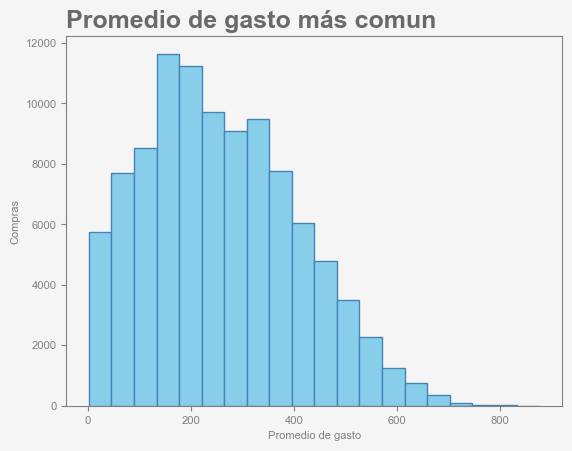

In [17]:
# Versión sendilla

# elegimos la columna, el tipo de grafico y el numero de barras
df_transaction['amount'].plot(kind='hist', bins=20)

# ponemos nombres a los ejes y título
plt.title('Promedio de gasto más comun')
plt.xlabel('Promedio de gasto')
plt.ylabel('Compras')

# lo enseñamos
plt.show()

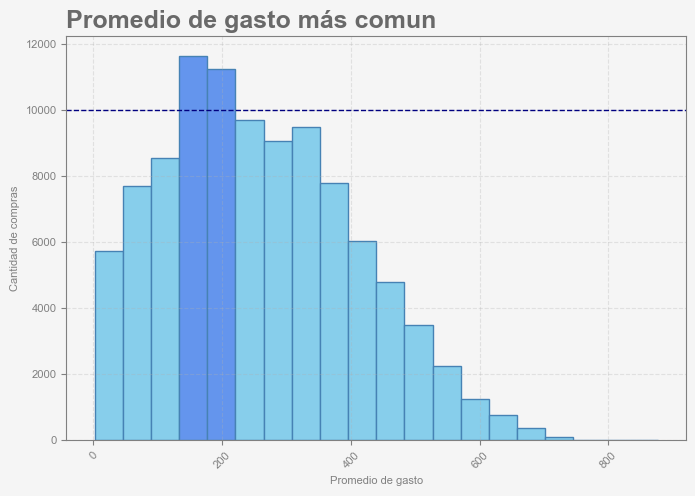

In [18]:

# Crear figura y eje
fig, ax = plt.subplots(figsize=(7, 5))

# Dibujar histograma dentro del eje
n, bins, patches = ax.hist(df_transaction['amount'], bins=20)

# Estilo del gráfico
ax.set_title('Promedio de gasto más comun')
ax.set_xlabel('Promedio de gasto')
ax.set_ylabel('Cantidad de compras')
ax.tick_params(axis='x', rotation=45)
ax.grid(True)

# Umbral en el eje Y
umbral_y = 10000

# Colorear barras según si superan el umbral
for count, patch in zip(n, patches):
    if count > umbral_y:
        patch.set_facecolor('cornflowerblue')  # Destacado
    else:
        patch.set_facecolor('skyblue')  # Normal

# Línea horizontal de referencia
ax.axhline(y=umbral_y, color='navy', linestyle='--', linewidth=1, label=f'Umbral Y: {umbral_y}')

plt.tight_layout()
plt.show()


### *¿Sabías que...* 
Lo más comun es que nuestros clientes gasten al rededor de 200 € en cada compra?, ¡¡esta cantidad supera las 10.000 transacciones!!

## 1.2.2 Dos variables numéricas
Ticket Medio según Edad

In [19]:
# Definimos df_merged uniendo usuarios y transacciones
df_merged = df_datauser.merge(
    df_transaction,
    left_on='id',
    right_on='user_id',
    how='left'
)

# Calculamos la edad de cada usuario
df_merged['edad'] = pd.to_datetime('today').year - pd.to_datetime(df_merged['birth_date']).dt.year

# 1. Agrupamos por usuario para calcular total y número de compras
df_ticket_usuario = df_merged.groupby('user_id').agg(
    importe_total=('amount', 'sum'),
    num_compras=('amount', 'count'),
    edad=('edad', 'first')  # asumimos que cada user_id tiene una sola edad
).reset_index()

# 2. Ticket medio por usuario
df_ticket_usuario['ticket_medio'] = df_ticket_usuario['importe_total'] / df_ticket_usuario['num_compras']

# 3. Agrupamos por edad para obtener el ticket medio promedio por franja
df_edad_ticket = df_ticket_usuario.groupby('edad')['ticket_medio'].mean().reset_index()


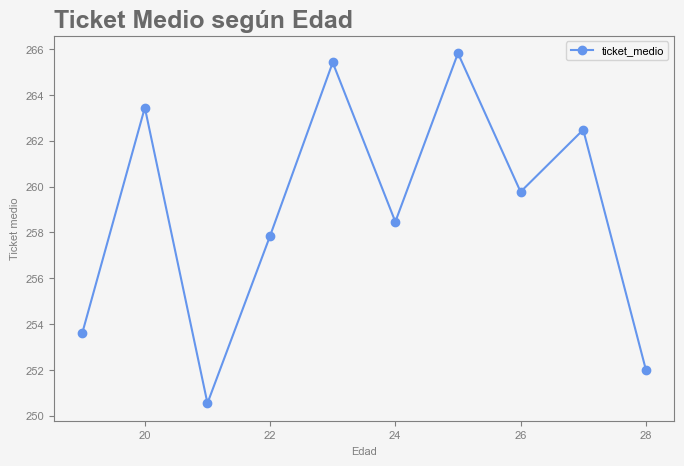

In [20]:
# Versión panda

grafico = df_edad_ticket.head(10)

grafico.plot(x='edad', y='ticket_medio', kind='line', marker='o', figsize=(8, 5), color='cornflowerblue')

plt.title('Ticket Medio según Edad')
plt.xlabel('Edad')
plt.ylabel('Ticket medio')

plt.show()

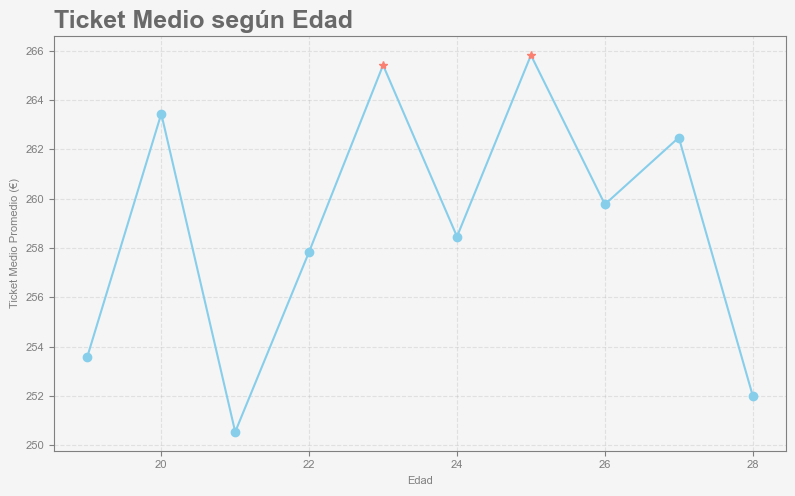

In [21]:

# preparamos los datos
df = df_edad_ticket.head(10)
x = df['edad']
y = df['ticket_medio']

# Crear figura y eje
fig, ax = plt.subplots(figsize=(8, 5))

# Dibujar gráfico (ejemplo: barras)
ax.plot(x, y)

# Estilo
ax.set_xlabel('Edad')
ax.set_ylabel('Ticket Medio Promedio (€)')
ax.set_title('Ticket Medio según Edad')
ax.grid(True)

# Personalización (colores, líneas, etiquetas...)

# creamos un umbral para destacar un valor
umbral_y = 265

for i in range(len(y)):
    valor = y[i]
    if valor > umbral_y:
        ax.plot(x[i], y[i], marker='*', color='salmon')
    else:
        ax.plot(x[i], y[i], marker='o', color='skyblue')

plt.tight_layout()
plt.show()


### *¿Sabías que...* 
Los clientes de 21 y 23 años son los que tienen un ticket medio más alto?

## 1.2.3 Una variable categórica
 
 Usuarios por región

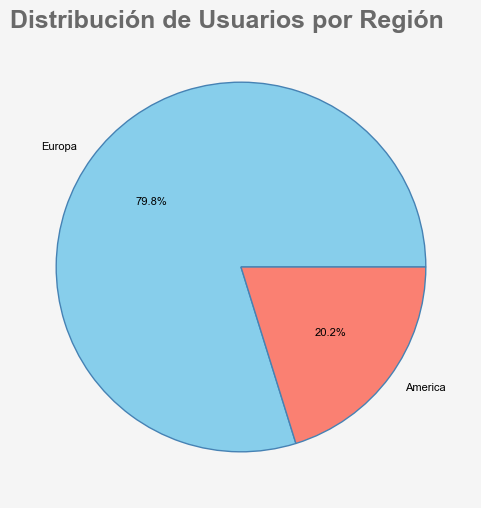

In [22]:
# elegimos columna region
grafico = df_datauser['region'].value_counts()

# grafico de tarta con 1 decimal
grafico.plot.pie(autopct='%1.1f%%', figsize=(6,6))

plt.title('Distribución de Usuarios por Región')
plt.ylabel('') # omitimos el y label

plt.show()

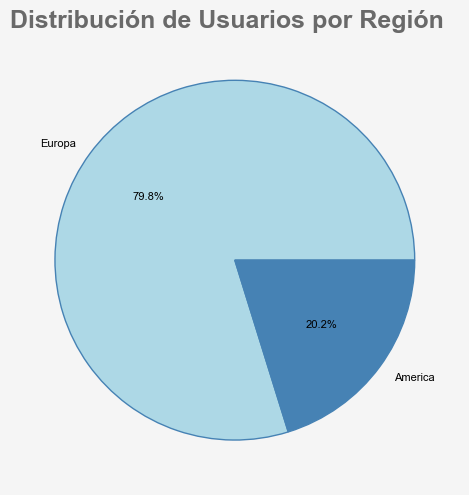

In [23]:
# Preparamos los datos
serie = df_datauser['region'].value_counts()      # contamos cuántas veces aparece cada valor único en esa columna
labels = serie.index                              # separamos las etiquetas y los valores
sizes = serie.values

# Crear figura y eje
fig, ax = plt.subplots(figsize=(5, 5))           # nombramos los dos objetos como fig (lienzo) y ax (figura) para usarlos más adelante

# Dibujamos la figura como gráfico de pastel
ax.pie(
    sizes,
    labels=labels,
    autopct='%.1f%%',                            # queremos 1 decimal y el simbolo %
    colors=['lightblue', 'steelblue']
)

# Estilo
ax.set_title('Distribución de Usuarios por Región')
ax.set_ylabel('')                                 # Oculta etiqueta Y 

plt.tight_layout()
plt.show()


### *¿Sabías que...* 
Europa tiene casi tres veces más clientes que America?

## 1.2.4 Dos variables categórica y una numérica

Clientes por región y país

In [24]:
# Creamos el DF

# Agrupamos por Región y País y contamos los clientes (user_id) unicos
df_RegionxCountry = df_datauser.groupby(['region', 'country'])['id'].nunique().reset_index(name='num_clientes')

# Ordenamos el DataFrame por región para que aparezcan agrupados
df_RegionxCountry = df_RegionxCountry.sort_values(by=['region', 'num_clientes'], ascending=[True, False])

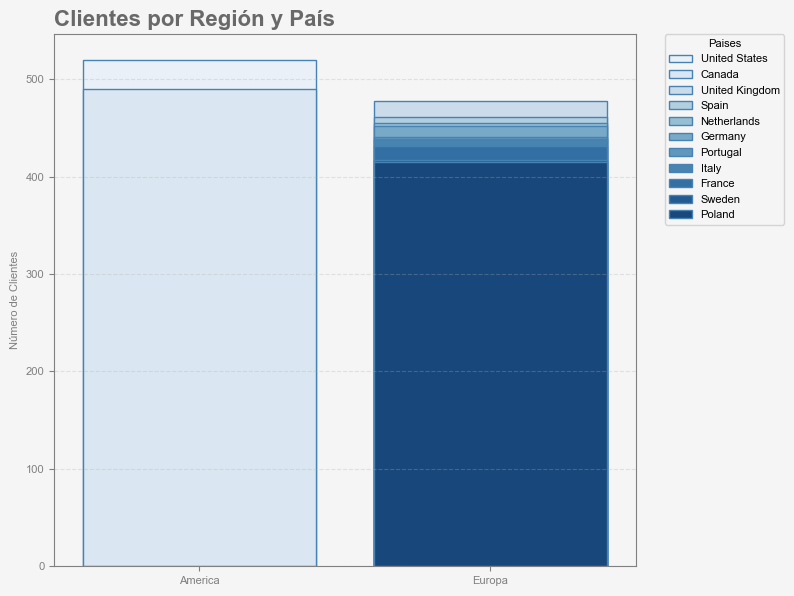

In [25]:

# Crear figura y eje
fig, ax = plt.subplots(figsize=(8, 6))


# Dibujamos la figura

sns.barplot(
    data=df_RegionxCountry, 
    x='region',                             # x: La variable categórica para las barras principales (Región)
    y='num_clientes',                       # y: La métrica numérica (Número de Clientes)
    hue='country',                          # hue: La variable que define los segmentos apilados y los colores (País)
    dodge=False,                            # Para que las barras se apilen y no se separen
    ax=ax, 
    palette='Blues'
)

# Estilo
ax.set_title('Clientes por Región y País', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('Número de Clientes')
ax.tick_params(axis='x') # No es necesario rotar si solo hay 2 regiones
ax.grid(axis='y', linestyle='--')

# Mejorar la leyenda si hay muchos países, o ajustarla
plt.legend(title='Paises', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

### *¿Sabías que...* 
En europa la mayoría de nuestros clientes están en Poland?

## 1.2.5 Dos variables numéricas y una categórica

Ventas hechas y declinadas por producto

In [26]:
# aseguramos la compatibilidad
df_compras['producto_id'] = df_compras['producto_id'].astype(int)
df_products['id'] = df_products['id'].astype(int)

# 1. Unimos transacciones con la tabla intermedia
df_comprasxproductos = df_compras.merge(df_transaction, left_on='id', right_on='id', how='left')

# 2. Unimos con la tabla de productos
df_comprasxproductos = df_comprasxproductos.merge(df_products, left_on='producto_id', right_on='id', how='left')

# 3. Limpiar columnas duplicadas si es necesario
df_comprasxproductos = df_comprasxproductos[['id_x', 'amount', 'producto_id', 'product_name', 'declined']]

df_comprasxproductos

,id_x,amount,producto_id,product_name,declined
0,00043A49-2949-494B-A5DD-A5BAE3BB19DD,395.43,16,the duel warden,0
1,00043A49-2949-494B-A5DD-A5BAE3BB19DD,395.43,26,Stark Karstark,0
2,00043A49-2949-494B-A5DD-A5BAE3BB19DD,395.43,97,jinn Winterfell,0
3,00043A49-2949-494B-A5DD-A5BAE3BB19DD,395.43,87,sith Jade,0
4,000447FE-B650-4DCF-85DE-C7ED0EE1CAAD,155.63,66,mustafar jinn,0
...,...,...,...,...,...
253386,FFFC9E8D-27C7-4ADE-98F2-7533EF4DF126,234.22,16,the duel warden,0
253387,FFFC9E8D-27C7-4ADE-98F2-7533EF4DF126,234.22,49,the giantsblood maester,0
253388,FFFCF76D-ECF0-4985-A2D0-B2A7B75998FC,148.91,18,Karstark warden,0
253389,FFFD31D6-9495-47CE-B54A-7DB8E1CC274B,74.54,48,rock Renly in,0


In [27]:
df_resumenCP = df_comprasxproductos.groupby('product_name').agg(
    total_ventas=('id_x', 'count'),
    num_declinadas=('declined', lambda x: (x == 1).sum())
).sort_values(by='total_ventas', ascending=False)

df_resumenCP

,total_ventas,num_declinadas
product_name,,
Winterfell,10071,30
the duel,10059,25
dooku solo,10022,17
Karstark Dorne,7694,28
skywalker ewok,7607,25
...,...,...
Tully Dorne,2462,10
Tarly Littlefinger,2462,9
Littlefinger the giantsblood,2457,4


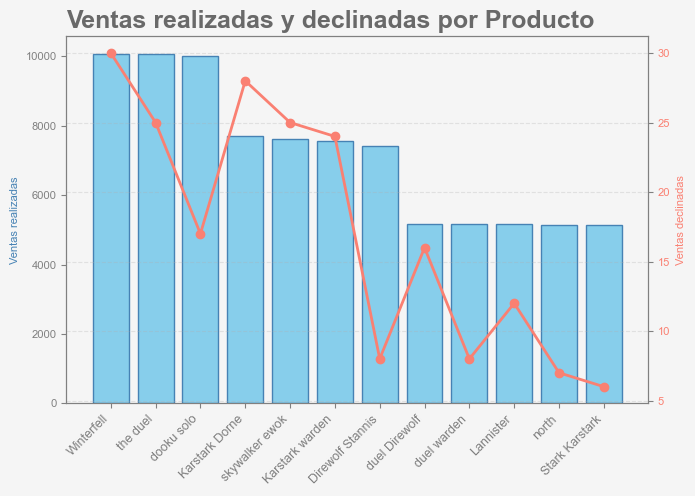

In [28]:
# preparamos los datos
df = df_resumenCP.head(12)
x = df.index
y1 = df['total_ventas'].values
y2 = df['num_declinadas'].values

# Crear figura y eje
fig, ax1 = plt.subplots(figsize=(7, 5))

# Dibujar gráfico (ejemplo: barras)
ax1.bar(x, y1)
ax1.set_ylabel('Ventas realizadas', color='steelblue')
ax1.set_xticks(range(len(x)))
ax1.set_xticklabels(x, rotation=45, ha='right', fontsize=9)
ax1.set_xlabel('')

# Le añadimos el segundo gráfico de líneas
ax2 = ax1.twinx() 
ax2.plot(x, y2, color='salmon', marker='o', linestyle='-', linewidth=2, label='Declinadas')
ax2.set_ylabel('Ventas declinadas', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

# Estilo y personalización
plt.ticklabel_format(style='plain', axis='y')  
plt.title('Ventas realizadas y declinadas por Producto')
plt.grid(True)

plt.tight_layout()
plt.show()



### *¿Sabías que...* 
Karstark Dorne tiene casi tantas ventas como Winterfell pero muchas menos ventas declinadas?

In [29]:
df_company['country'].value_counts()

country
Sweden            11
Netherlands       10
United States      9
United Kingdom     9
Italy              9
Germany            8
Belgium            8
Norway             7
Australia          6
New Zealand        6
Ireland            6
Canada             5
France             3
China              2
Spain              1
Name: count, dtype: int64

## 1.2 Dos variables combinadas

Empresas por país

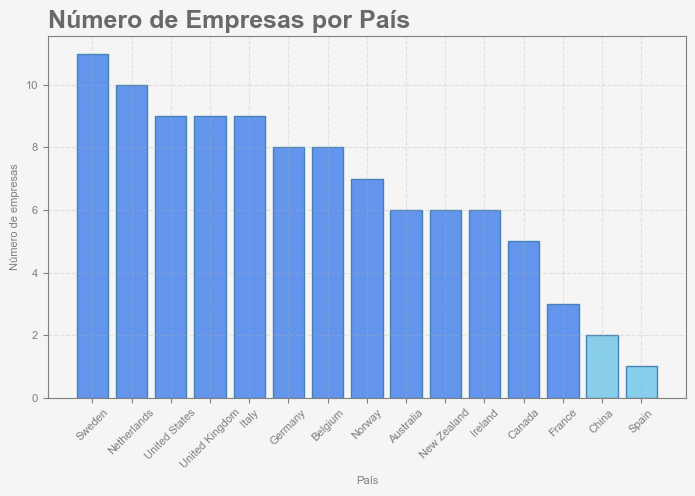

In [30]:
# preparamos los datos
df = df_company['country'].value_counts()
x = df.index
y = df.values

# Crear figura y eje
fig, ax = plt.subplots(figsize=(7, 5))

# Dibujar gráfico (ejemplo: barras)
ax.bar(x, y)

# Estilo
ax.set_title('Número de Empresas por País')
ax.set_xlabel('País')
ax.set_ylabel('Número de empresas')
ax.tick_params(axis='x', rotation=45)
ax.grid(True)

# Personalización (colores, líneas, etiquetas...)
# Umbral en el eje Y
umbral_y = 2

for bar in ax.patches:
    valor = bar.get_height()
    if valor > umbral_y:
        bar.set_facecolor('cornflowerblue')
    else:
        bar.set_facecolor('skyblue')

plt.tight_layout()
plt.show()


### *¿Sabías que...* 
España es la que menos empresas tiene?

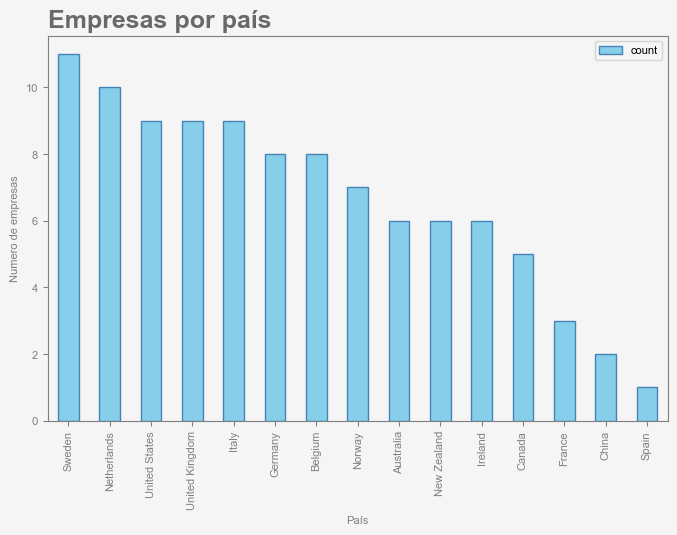

In [31]:
# Versión panda sencilla

grafico = df_company['country'].value_counts().reset_index()
grafico.plot(x='country', kind='bar', figsize=(8, 5))

plt.title('Empresas por país')
plt.xlabel('País')
plt.ylabel('Numero de empresas')

plt.show()

## 1.2 Tres variables combinadas

Pedidos e ingresos por año

In [32]:

df_transaction['año'] = pd.to_datetime(df_transaction['timestamp']).dt.year   # convertimos a datetime y sacamos el año de esa columna

df_ventasXaño = df_transaction.groupby('año').agg({                           # agrupamos por año
    'id': 'count',                                                            # Número de pedidos
    'amount': 'sum'                                                           # Total de ingresos
}).reset_index().rename(columns={'id': 'num_pedidos', 'amount': 'ingresos'})

df_ventasXaño

,año,num_pedidos,ingresos
0,2015,9870,2545190.07
1,2016,9855,2556344.72
2,2017,9915,2571455.22
3,2018,9912,2546896.83
4,2019,10015,2610818.43
5,2020,10093,2607486.59
6,2021,10298,2649462.92
7,2022,10106,2640035.64
8,2023,9985,2580524.58
9,2024,9951,2593316.17


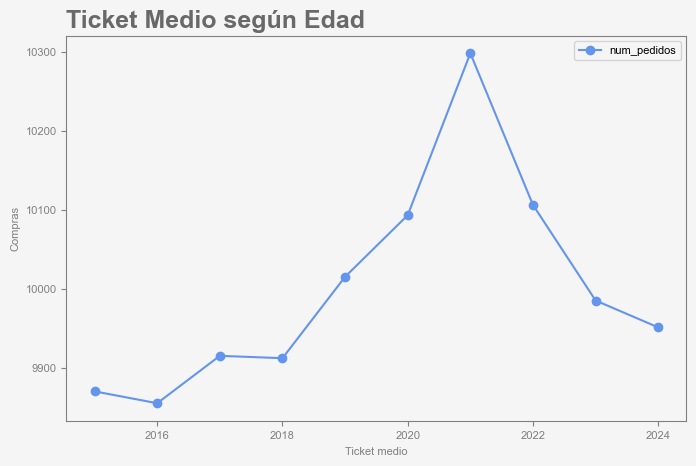

In [33]:
# Versión panda sencilla

import matplotlib.pyplot as plt
import pandas as pd

grafico = df_ventasXaño

grafico.plot(x='año', y='num_pedidos', kind='line', marker='o', figsize=(8, 5), color='cornflowerblue')

plt.title('Ticket Medio según Edad')
plt.xlabel('Ticket medio')
plt.ylabel('Compras')

plt.show()

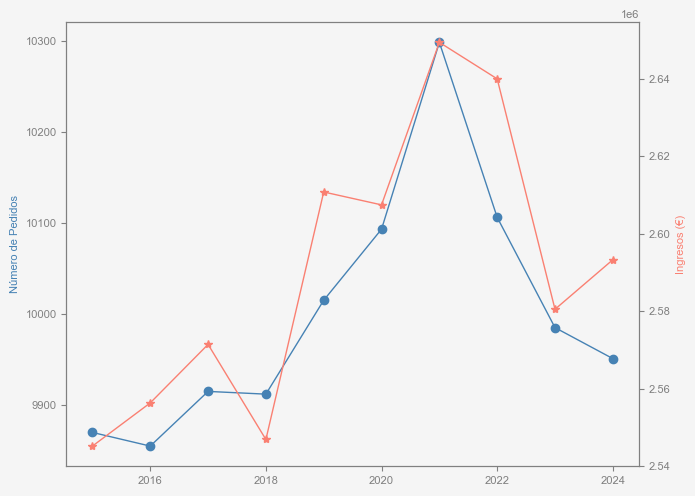

In [34]:


# Crear figura y eje
fig, ax1 = plt.subplots(figsize=(7, 5))

# Dibujar gráfico
# Eje izquierdo: número de pedidos
ax1.plot(df_ventasXaño['año'], df_ventasXaño['num_pedidos'], color='steelblue', marker='o', linewidth=1, label='Pedidos')
ax1.tick_params(axis='y')

# Eje derecho: ingresos
ax2 = ax1.twinx()
ax2.plot(df_ventasXaño['año'], df_ventasXaño['ingresos'], color='salmon', marker='*', linewidth=1, label='Ingresos (€)')
ax2.tick_params(axis='y')

# Estilo
ax.set_title('Pedidos e Ingresos por Año')
ax.set_xlabel('Año')

ax1.set_ylabel('Número de Pedidos', color='steelblue')
ax2.set_ylabel('Ingresos (€)', color='salmon')

ax.tick_params(axis='x', rotation=45)
ax.grid(True)

plt.tight_layout()
plt.show()

### *¿Sabías que...* 
En 2019 hubo más ingresos que en el 2020 aunque los pedidos fueron menores?

## 1.2 Un pairplot

Ingresos y pedidos por año

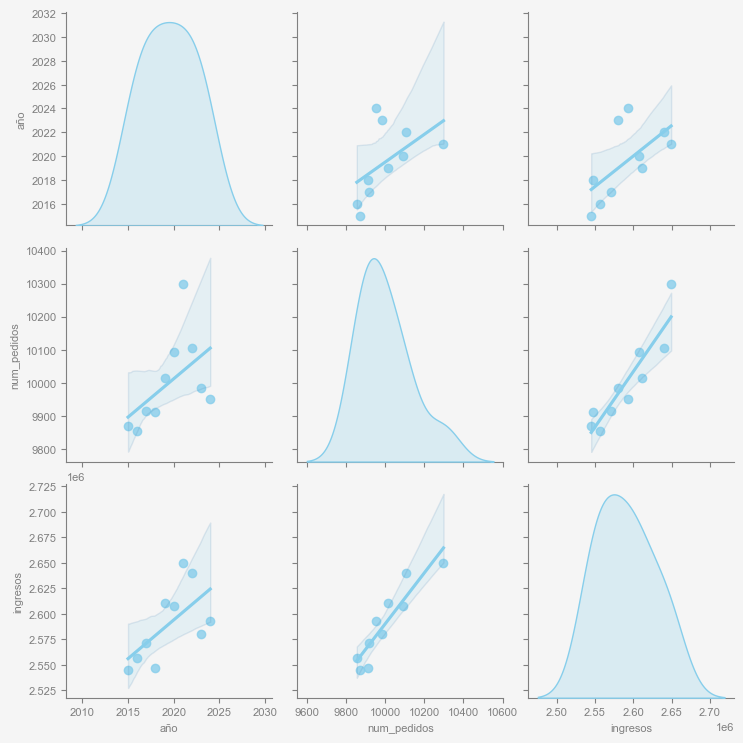

In [35]:
# Vamos a ver la correlación entre año, pedidos e ingresos

sns.pairplot(df_ventasXaño, kind='reg', diag_kind='kde')
plt.show()


### *¿Sabías que...* 
Los pedidos y los ingresos suelen crecer juntos pero no siempre al mismo ritmo? 

# Nivel 2

## 2.1 un Heatmap

Correlación de distintas variables

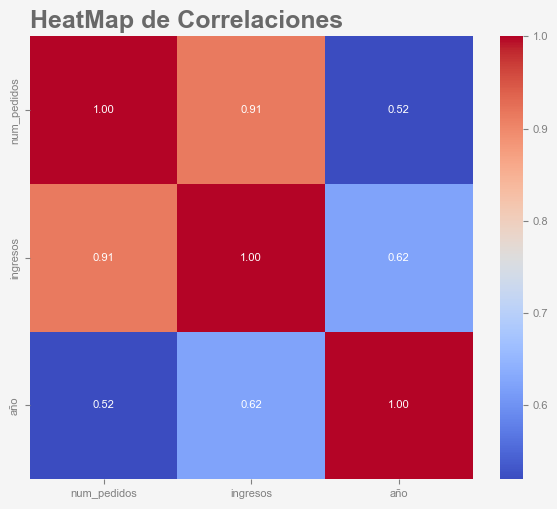

In [36]:
# Seleccionamos solo las columnas numéricas
df_corr = df_ventasXaño[['num_pedidos', 'ingresos', 'año']]

# Calculamos la matriz de correlación
corr_matrix = df_corr.corr()

# Dibujamos el mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)

plt.title('HeatMap de Correlaciones')
plt.tight_layout()
plt.show()

#### Mapa de calor de correlaciones

En este mapa se pone a prueba la correlación de tres variables, Año, Número de pedidos e Ingresos, en su mayoría positivas

**Correlación muy alta:** El número de pedidos + ingresos tiene una correlación positiva muy fuerte, aumentando los ingresos con los pedidos. 

**Correlación Alta:** Se puede ver una correlación positiva entre los años y los ingresos. 

**Correlación Moderada:** El numero de pedidos junto con los ingresos también ha ido al alza con los años. 

***Observación*** Esto no quiere decir que haya ido al alza, sabemos por otros gráficos que las ventas subieron hasta 2021 y de ahí bajaron, pero como han ido de la mano en esa subida y bajada, la correlación es positiva. 

## 2.2 un Jointplot
Implementa un Jointplot para explorar la relación entre dos variables e interpreta los resultados según tus datos.

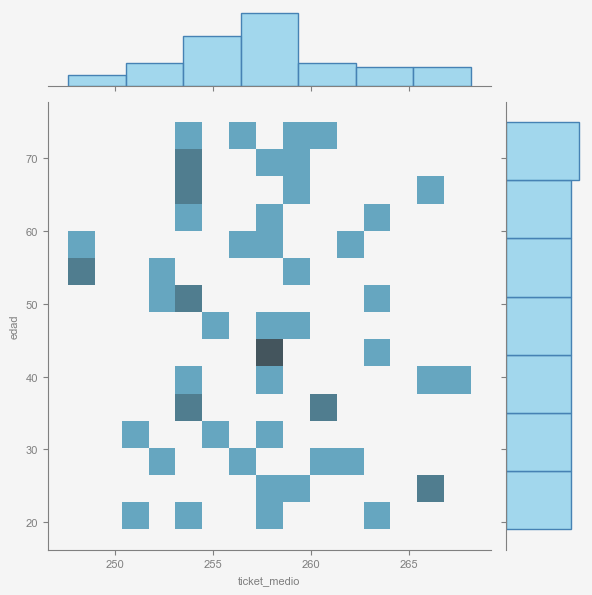

In [37]:

sns.jointplot(data=df_edad_ticket, 
              x='ticket_medio', 
              y='edad', 
              kind='hist', 
              bins=15,         # Aumenta el número de bins → cuadrados más pequeños
              height=6)


plt.show()


#### Joinplot de relaciones

En este Joinplot se observa la relación del ticket medio por la edad. 

**Relación muy alta:** 
El público de entre 25 y 30 años suele tener un ticket medio aproximado de 255€, siendo más comun aun cuanto más cerca de los 30 están.

También se observa una relación alta entre el público de 65 años con el ticket medio de 250€. 

**Correlación Alta:** 
Se puede que el ticket medio de 255€ también es comun entre los de 25, 30, 55 y 60 años.  
También destaca que el publico de más de 40 años gasta cerca de 260€ así como el de más de 70, que la mayoría de ventas oscilan entre 250€ y 270€.

**Correlación Moderada:** Las ventas tienden a agruparse en el 255, siendo este bastante comun en todas las edades.
